# **Análisis de Regresión Lineal** 📈

En esta sesión, aprenderás a realizar un análisis de regresión lineal simple y múltiple utilizando datos de PISA 2009 para Chile. Exploraremos cómo evaluar los supuestos del modelo de regresión, interpretar los resultados y visualizar las relaciones entre las variables. También, discutiremos cómo comparar diferentes modelos de regresión y cómo interpretar la importancia relativa de los predictores.

Al igual que en las sesiones previas, es importante comenzar estableciendo el directorio de trabajo, la cual refiere a la carpeta de tu computador donde se encuentran los datos que vamos a analizar.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Instalar y Cargar Paquetes**

En Python, podemos usar pip para instalar los paquetes necesarios. Usaremos `!pip install` para instalar los paquetes y luego los importaremos. Los paquetes necesarios son `pandas`, `matplotlib`, `seaborn`, `statsmodels`, `scikit-learn`, entre otros.

In [4]:
!pip install pandas matplotlib seaborn statsmodels scikit-learn Pyreadstat

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.8 MB/s eta 0:00:00


## **Importar Datos**

A continuación, importamos los datos de PISA 2009 para Chile. En Python, utilizaremos el paquete `pandas` para manejar archivos .sav.


In [5]:
import pandas as pd
import pyreadstat

# Cargar el archivo SPSS
pisa2009_chl = pd.read_spss('/content/drive/My Drive/Teaching/Metodología Cuantitativa II 2024/Sesión 2/pisa2009_chl.sav')
pisa2009_chl.head()

,ctry,school,id,sex,ses,sesj,math,read,scie,type,public,subv,priv
0,CHL,00001,00003,Female,-0.2907,-1.45282,414.40,534.29,479.99,NaN,NaN,NaN,NaN
1,CHL,00001,00002,Female,-0.7978,-1.45282,347.49,396.47,413.60,NaN,NaN,NaN,NaN
2,CHL,00001,00005,Female,-2.5471,-1.45282,391.03,456.84,392.33,NaN,NaN,NaN,NaN
3,CHL,00001,00001,Female,-2.3071,-1.45282,416.90,451.20,407.72,NaN,NaN,NaN,NaN
4,CHL,00001,00004,Female,-1.3214,-1.45282,422.04,459.54,438.40,NaN,NaN,NaN,NaN


## **Exploración Inicial de los Datos**
Antes de proceder al análisis, es importante entender la estructura y el contenido del conjunto de datos.


In [6]:
# Verifica la clase del objeto 'pisa2009_chl'
print(type(pisa2009_chl))

# Muestra los primeros 6 casos de la base de datos
print(pisa2009_chl.head())

# Lista los nombres de las variables
print(pisa2009_chl.columns)

# Muestra el número de variables y casos
print(pisa2009_chl.shape)

# Proporciona un resumen estadístico para cada variable
print(pisa2009_chl.describe())

# Muestra la estructura interna del data frame
print(pisa2009_chl.info())

<class 'pandas.core.frame.DataFrame'>
  ctry school     id     sex     ses     sesj    math    read    scie type  \
0  CHL  00001  00003  Female -0.2907 -1.45282  414.40  534.29  479.99  NaN   
1  CHL  00001  00002  Female -0.7978 -1.45282  347.49  396.47  413.60  NaN   
2  CHL  00001  00005  Female -2.5471 -1.45282  391.03  456.84  392.33  NaN   
3  CHL  00001  00001  Female -2.3071 -1.45282  416.90  451.20  407.72  NaN   
4  CHL  00001  00004  Female -1.3214 -1.45282  422.04  459.54  438.40  NaN   

  public subv priv  
0    NaN  NaN  NaN  
1    NaN  NaN  NaN  
2    NaN  NaN  NaN  
3    NaN  NaN  NaN  
4    NaN  NaN  NaN  
Index(['ctry', 'school', 'id', 'sex', 'ses', 'sesj', 'math', 'read', 'scie',
       'type', 'public', 'subv', 'priv'],
      dtype='object')
(5669, 13)
              math         read         scie
count  5669.000000  5669.000000  5669.000000
mean    424.820547   453.466860   451.645622
std      80.518921    82.533323    82.202213
min     194.740000   145.790000   1

## **Análisis Descriptivo**

### **Estadísticos Descriptivos**
Comenzamos con el análisis descriptivo del Índice de Estatus Económico, Social y Cultural (ESCS, por sus siglas en inglés en PISA) o simplemente estatus socioeconómico del estudiantes (`ses`) y del puntaje en matemáticas (`math`).

In [7]:
# Convertimos la variable `ses` a numérica, si no lo está ya
pisa2009_chl['ses'] = pd.to_numeric(pisa2009_chl['ses'], errors='coerce')

# Resumen descriptivo de SES
print(pisa2009_chl['ses'].describe())

# Desviación estándar de SES
print(pisa2009_chl['ses'].std())

# Varianza de SES
print(pisa2009_chl['ses'].var())

# Resumen descriptivo de math
print(pisa2009_chl['math'].describe())

# Desviación estándar de math
print(pisa2009_chl['math'].std())

# Varianza de math
print(pisa2009_chl['math'].var())

count    5580.000000
mean       -0.505586
std         1.164141
min        -4.245100
25%        -1.348025
50%        -0.566100
75%         0.361500
max         2.881400
Name: ses, dtype: float64
1.1641414923365998
1.3552254141796856
count    5669.000000
mean      424.820547
std        80.518921
min       194.740000
25%       370.000000
50%       421.260000
75%       477.650000
max       782.060000
Name: math, dtype: float64
80.51892081378374
6483.296609016375


### **Visualización de la Distribución de los Datos**
Para entender mejor la distribución de los datos, generamos varios gráficos usando el paquete `matplotlib`.

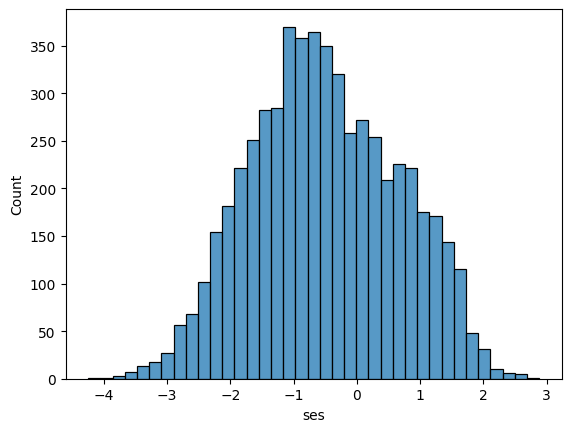

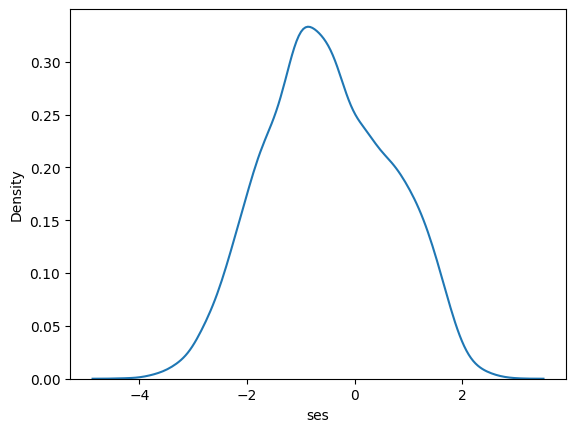

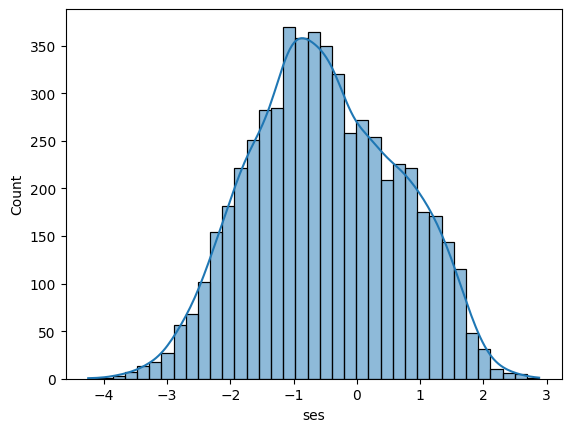

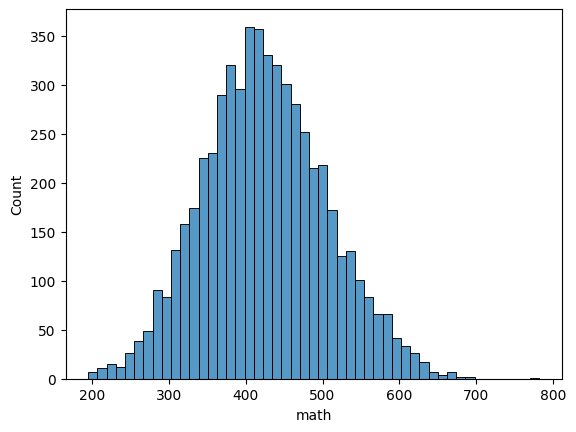

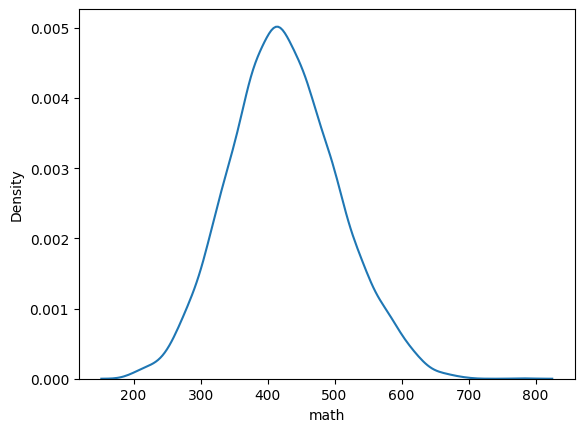

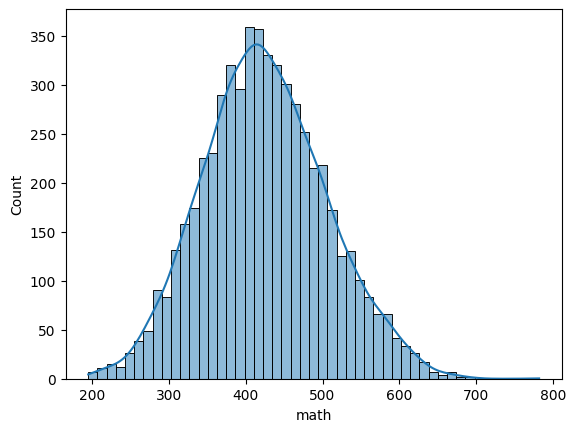

In [8]:
# Histograma de SES
sns.histplot(pisa2009_chl['ses'])
plt.show()

# Gráfico de Densidad de SES
sns.kdeplot(pisa2009_chl['ses'])
plt.show()

# Histograma y Densidad combinados
sns.histplot(pisa2009_chl['ses'], kde=True)
plt.show()

# Histograma de Math
sns.histplot(pisa2009_chl['math'])
plt.show()

# Gráfico de Densidad de Math
sns.kdeplot(pisa2009_chl['math'])
plt.show()

# Histograma y Densidad combinados
sns.histplot(pisa2009_chl['math'], kde=True)
plt.show()

## **Análisis de Regresión Lineal**

### **Regresión Lineal Simple**

Realizaremos una regresión lineal simple para predecir el puntaje en matemáticas (`math`) utilizando el índice de estatus socioeconómico como predictor.

In [10]:
# Convertimos la variable `ses` a numérica, si no lo está ya
pisa2009_chl['ses'] = pd.to_numeric(pisa2009_chl['ses'], errors='coerce')

# Filtramos las filas con valores infinitos o missing en 'ses' y 'math'
pisa2009_chl_complete = pisa2009_chl.dropna(subset=['ses', 'math'])

X = pisa2009_chl_complete[['ses']]
y = pisa2009_chl_complete['math']

# Añadimos una constante al modelo (intercepto)
X = sm.add_constant(X)

# Ajustamos el modelo
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   math   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     1503.
Date:                Tue, 20 Aug 2024   Prob (F-statistic):          2.60e-291
Time:                        23:15:42   Log-Likelihood:                -31741.
No. Observations:                5580   AIC:                         6.349e+04
Df Residuals:                    5578   BIC:                         6.350e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        441.7171      1.044    423.298      0.0

#### **Evaluación de los Supuestos del Modelo de Regresión**
Es fundamental evaluar los supuestos estadísticos del modelo de regresión para asegurarnos de que los resultados sean válidos.

-   **Supuesto de Linealidad**
El supuesto de linealidad indica que la relación entre el predictor (ses) y la variable dependiente (math) es lineal. Para evaluar la linealidad, podemos utilizar un diagrama de dispersión (scatter plot) que muestre la relación entre la variable predictora `ses` (Índice de Estatus Económico, Social y Cultural) y la variable dependiente `math` (Puntaje en Matemáticas).

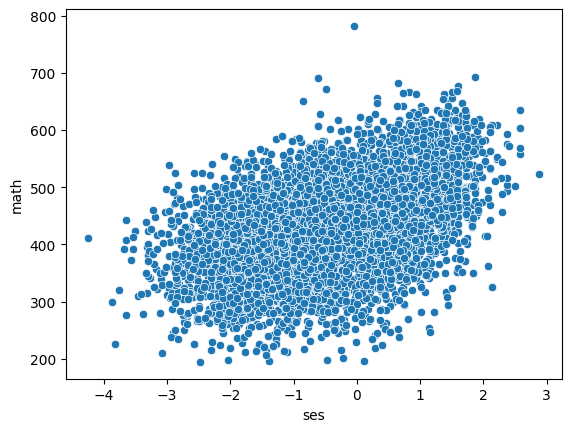

In [11]:
# Evaluar el supuesto de linealidad con un scatter plot
sns.scatterplot(x='ses', y='math', data=pisa2009_chl)
plt.show()

*Interpretación:* Si los puntos en el gráfico muestran una tendencia a alinearse en una línea recta (ascendente o descendente), podemos asumir que la relación es aproximadamente lineal. Si los puntos siguen una forma curvilínea, la relación podría no ser lineal, lo que sugeriría la necesidad de transformar las variables o considerar un modelo diferente.

-   **Supuesto de Normalidad de los Residuos**
El supuesto de normalidad de los residuos indica que los errores del modelo (es decir, las diferencias entre los valores observados y los valores predichos) deben distribuirse normalmente. Esto es crucial para validar las pruebas de significancia estadística (prueba **t** de Student) que se utiliza en la regresión. Para evaluar este supuesto, utilizamos varias aproximaciones:

    -  **Histograma de los residuos**: Permite observar la distribución de los errores.
    -   **Gráfico de densidad**: Proporciona una visualización suave de la distribución de los residuos.
    -   **Gráfico Cuantil-Cuantil (Q-Q plot)**: Compara la distribución de los residuos con una distribución normal teórica.
    -   **Prueba de Shapiro-Wilk**: Prueba estadística que evalúa la normalidad de los residuos.

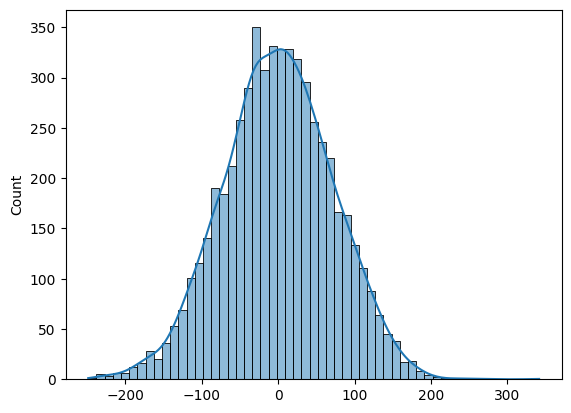

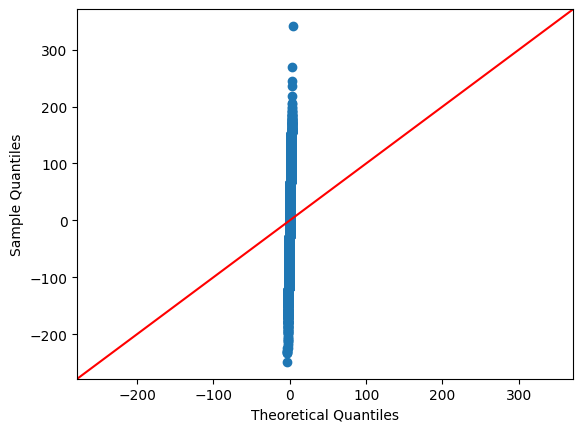

Shapiro-Wilk Test: ShapiroResult(statistic=0.9993875248304943, pvalue=0.05587672102607926)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5580.
  res = hypotest_fun_out(*samples, **kwds)


In [12]:
# Evaluación de la normalidad de los residuos
# Histograma de los residuos
sns.histplot(model.resid, kde=True)
plt.show()

# Q-Q plot de los residuos
sm.qqplot(model.resid, line='45')
plt.show()

# Prueba de Shapiro-Wilk
from scipy.stats import shapiro
shapiro_test = shapiro(model.resid)
print('Shapiro-Wilk Test:', shapiro_test)

-   **Supuesto de Homocedasticidad**
El supuesto de homocedasticidad establece que la varianza de los residuos es constante a lo largo de todos los valores de la variable predictora. Esto significa que los errores del modelo no deberían mostrar patrones sistemáticos cuando se grafican contra los valores predichos. La falta de homocedasticidad, conocida como heterocedasticidad, puede llevar a estimaciones sesgadas de los coeficientes de regresión.

Para evaluar este supuesto, utilizamos el test de Breusch-Pagan, que es una prueba estadística que evalúa la presencia de heterocedasticidad. Si el test de Breusch-Pagan indica Un valor *p* > .05, entonces este sugiere que no se puede rechazar la hipótesis nula de homocedasticidad, indicando que la varianza de los residuos es constante. Si el valor *p* es menor a 0.05, hay evidencia de heterocedasticidad, lo que podría requerir la transformación de variables o el uso de un modelo robusto.

In [13]:
# Evaluación de la homocedasticidad usando test de Breusch-Pagan
_, pval, _, f_pval = het_breuschpagan(model.resid, model.model.exog)
print('Breusch-Pagan p-value:', pval)

Breusch-Pagan p-value: 3.1697478275550277e-07


### **Regresión Lineal Múltiple**
A continuación, realizamos una regresión lineal múltiple, agregando más predictores al modelo.

In [15]:
# Recodificación de la variable sexo
pisa2009_chl['female'] = pisa2009_chl['sex'].apply(lambda x: 1 if x == 'female' else 0)

# Filtramos las filas con valores infinitos o missing en las variables relevantes
pisa2009_chl_complete = pisa2009_chl.dropna(subset=['ses', 'female', 'read', 'scie', 'math'])

# Ajuste del modelo de regresión lineal múltiple
X_mult = pisa2009_chl_complete[['ses', 'female', 'read', 'scie']]
X_mult = sm.add_constant(X_mult)
y_mult = pisa2009_chl_complete['math']  # Usamos el DataFrame filtrado para y también
model_mult = sm.OLS(y_mult, X_mult).fit()

# Resumen del modelo
print(model_mult.summary())

                            OLS Regression Results                            
Dep. Variable:                   math   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     6737.
Date:                Tue, 20 Aug 2024   Prob (F-statistic):               0.00
Time:                        23:17:52   Log-Likelihood:                -28134.
No. Observations:                5580   AIC:                         5.628e+04
Df Residuals:                    5576   BIC:                         5.630e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.4385      3.368     12.008      0.0

-   **Evaluación de la Multicolinealidad**
En este caso como tenemos 2 o más predictores, debemos evaluar la multicolinealidad en el modelo. La multicolinealidad ocurre cuando dos o más variables predictoras en un modelo de regresión están altamente correlacionadas entre sí. Esto puede ser problemático porque impide la estimación de un modelo de regresión. Para ello, observamos las correlaciones entre los predictores y calculamos el factor de inflación de la varianza (VIF).

Podemos evaluar la presencia de multicolinealidad en un modelo de regresión generando una matriz de correlación de los predictores puede dar una idea inicial sobre las relaciones bivariadas entre ellos. Observamos si hay correlaciones altas (generalmente *r* > 0.8 o < -0.8) entre dos variables predictoras pueden ser una indicador de multicolinealidad.

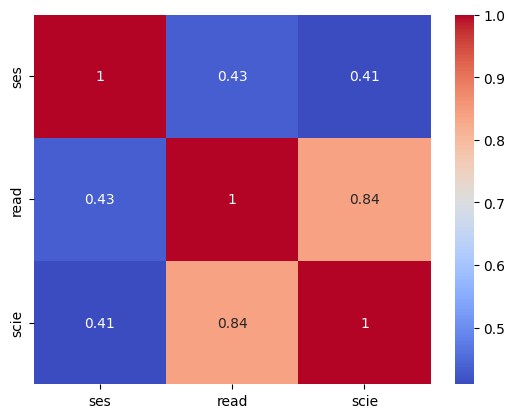

In [16]:
# Matriz de correlación
correlaciones = pisa2009_chl[['ses', 'read', 'scie']].corr()
sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
plt.show()

También, podemos estimar el factor de inflación de la varianza (VIF). El VIF mide cuánto la varianza de un coeficiente de regresión está inflada debido a la multicolinealidad. Un VIF de 1 indica que no hay correlación entre la variable predictora y las demás variables predictoras. Un VIF entre 1 y 5 sugiere una correlación moderada pero aceptable. Un VIF mayor que 5 (algunos usan el umbral de 10) indica una alta multicolinealidad que podría ser problemática.

In [17]:
# Cálculo del VIF para cada predictor
vif_data = pd.DataFrame()
vif_data['feature'] = X_mult.columns
vif_data['VIF'] = [variance_inflation_factor(X_mult.values, i) for i in range(X_mult.shape[1])]

print(vif_data)

  feature        VIF
0   const  45.087025
1     ses   1.242697
2  female        NaN
3    read   3.486039
4    scie   3.399753


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


*Interpretación*: Si alguna de las variables en el modelo tiene un VIF alto (por ejemplo, mayor a 5), esto indica que la variable está altamente correlacionada con una o más de las otras variables predictoras, lo que sugiere multicolinealidad.

**¿Qué hacer si hay multicolinealidad?**
-   Eliminar una de las variables correlacionadas: Si dos variables están altamente correlacionadas, podrías considerar eliminar una de ellas para reducir la multicolinealidad.
-   Transformar las variables: En algunos casos, la transformación de las variables (por ejemplo, usando logaritmos o diferencias) puede reducir la multicolinealidad.

En Python, no existe un equivalente directo de `anova()` en R para comparar modelos de regresión lineal en `statsmodels`. Pero puedes comparar los modelos utilizando los estadísticos de ajuste, como el AIC (Criterio de Información de Akaike) o BIC (Criterio de Información Bayesiana). Un modelo con un valor de AIC o BIC más bajo se considera que ajusta mejor los datos.

In [18]:
print("AIC Modelo 1 (simple):", model.aic)
print("AIC Modelo 2 (múltiple):", model_mult.aic)

print("BIC Modelo 1 (simple):", model.bic)
print("BIC Modelo 2 (múltiple):", model_mult.bic)

AIC Modelo 1 (simple): 63486.72166809326
AIC Modelo 2 (múltiple): 56276.46222529723
BIC Modelo 1 (simple): 63499.975556204015
BIC Modelo 2 (múltiple): 56302.97000151873


#### **Importancia Relativa de los Predictores**
Calculamos la importancia relativa de cada predictor en el modelo de regresión múltiple.


In [19]:
from sklearn.preprocessing import StandardScaler

# Escalamos las variables para obtener coeficientes estandarizados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_mult)

# Reajustamos el modelo con las variables estandarizadas
model_mult_scaled = sm.OLS(y, X_scaled).fit()

# Importancia relativa basada en los coeficientes estandarizados
importance_relative = abs(model_mult_scaled.params / model_mult_scaled.params.sum())
print("Importancia relativa de los predictores:")
print(pd.DataFrame({'Predictor': X_mult.columns, 'Importancia Relativa': importance_relative}))

Importancia relativa de los predictores:
      Predictor  Importancia Relativa
const     const          0.000000e+00
x1          ses          9.759983e-02
x2       female          4.120453e-18
x3         read          3.475391e-01
x4         scie          5.548611e-01
